In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec

from utils import *

DATA_PATH = "./data/"

%load_ext autoreload
%autoreload 2

# Task 2 Approximating linear vector fields

In [2]:
x0 = np.loadtxt(DATA_PATH + "linear_vectorfield_data_x0.txt")
x1 = np.loadtxt(DATA_PATH + "linear_vectorfield_data_x1.txt")

In [3]:
def set_font(ax, size, title):
    ax.tick_params(labelsize=size)
    ax.set_xlabel("x", fontdict={'weight':'normal','size': size})
    ax.set_ylabel("y", fontdict={'weight':'normal','size': size})
    ax.set_title(title, fontdict={'weight':'normal','size': size})

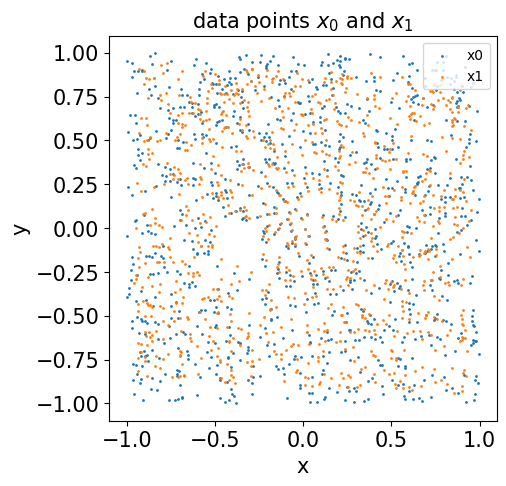

In [4]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.scatter(x0[:,0], x0[:,1], s=1, label='x0')
ax.scatter(x1[:,0], x1[:,1], s=1, label='x1')
ax.legend()
set_font(ax, 15, f"data points $x_0$ and $x_1$")

## part 1

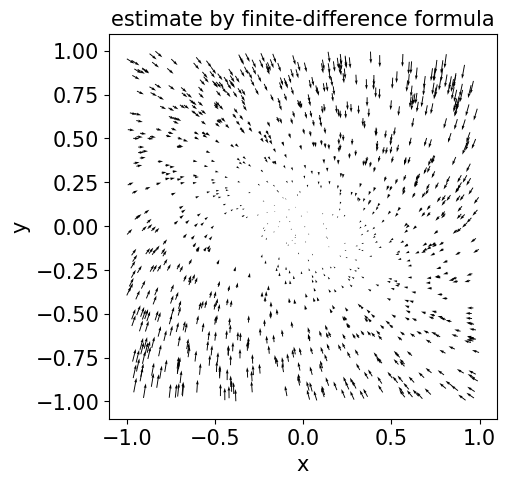

In [5]:
v = (x1 - x0) / 0.1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.quiver(x0[:,0], x0[:,1], v[:,0], v[:,1], units='xy')
set_font(ax, 15, "estimate by finite-difference formula")

In [6]:
A,res,_,_ = scipy.linalg.lstsq(x0, v)
A = A.T

def linear_system(t, x, A): return A @ x

print(A)

[[-0.49355245  0.23191153]
 [-0.4638232  -0.95737573]]


## part 2

In [7]:
def solve(x0, start_time, end_time, t, A):
    x1_pre = np.zeros(x0.shape)
    for i in range(len(x0)):
        x1_pre[i, :] = solve_ivp(linear_system, t_span=[start_time, end_time], y0=x0[i, :], t_eval=t, args=[A])["y"].reshape(2,)
        
    return x1_pre

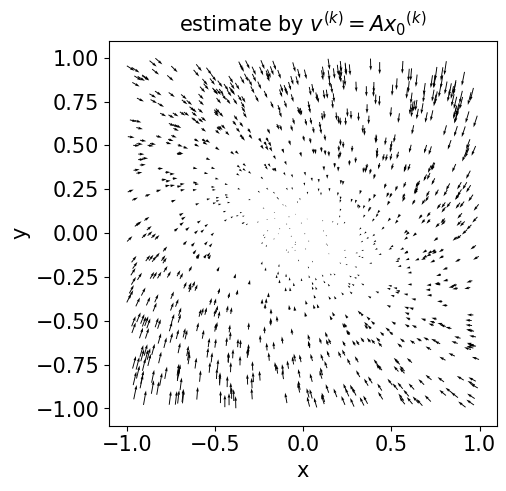

In [8]:
x1_pre = solve(x0, 0, 0.1, [0.1], A)
v_pre = (x1_pre - x0) / 0.1

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()

ax.quiver(x0[:,0], x0[:, 1], v_pre[:,0], v_pre[:, 1])
set_font(ax, 15, "estimate by $v^{(k)} = A{x_0}^{(k)}$")

In [9]:
squared_error = np.linalg.norm(x1_pre - x1) **2 / len(x0)
print(f"mse={squared_error}")

mse=9.95755729121606e-06


## part 3

In [12]:
def plot_phase_portrait_linear(w, A):
    """
    Plots a linear vector field in a streamplot, defined with X and Y coordinates and the matrix A.
    """
    Y, X = np.mgrid[-w:w:100j, -w:w:100j]
    UV = A @ np.row_stack([X.ravel(), Y.ravel()])
    UV = UV

    U = UV[0,:].reshape(X.shape)
    V = UV[1,:].reshape(X.shape)

    fig = plt.figure(figsize=(5,5))
    gs = gridspec.GridSpec(nrows=1, ncols=1)

    ax = fig.add_subplot(gs[0, 0])
    ax.streamplot(X, Y, U, V, density=[1, 1])
    ax.set_aspect(1)
    return ax

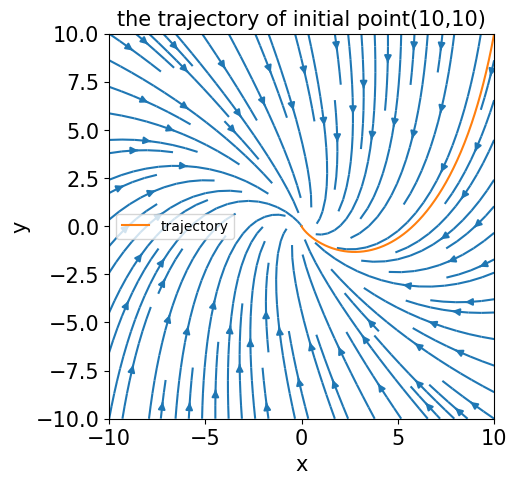

In [13]:
start_time = 0
end_time = 100
t = np.linspace(start_time, end_time, 10000)
x0_point = [10, 10]

x1_pre = solve_ivp(linear_system, [start_time, end_time], y0=x0_point, t_eval=t, args=[A])["y"]

ax = plot_phase_portrait_linear(10, A)
ax.plot(x1_pre[0,:], x1_pre[1,:], label="trajectory")
ax.legend()
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
set_font(ax, 15, "the trajectory of initial point(10,10)")